<a href="https://colab.research.google.com/github/kashifkhan9555/EDA_HOTEL_BOOKING/blob/main/hotel_Booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **KASHIF KHAN**


# **Project Summary -**

Hotel booking analysis refers to the process of examining the trends, patterns, and behaviors associated with hotel bookings. The analysis typically involves collecting data on hotel bookings, including the number of bookings, booking timeframes, customer demographics, and booking channels. The data is then analyzed to identify trends, patterns, and insights that can inform hotel marketing strategies, pricing decisions, and customer engagement efforts.

Hotel booking analysis is critical for hotel operators as it enables them to gain a better understanding of their customers and make informed decisions that can improve their bottom line. By analyzing data on booking trends and patterns, hotels can identify periods of high demand and adjust their prices accordingly to maximize revenue. They can also gain insights into the preferences of their customers, enabling them to tailor their marketing efforts to better target specific customer segments.

There are various sources of data that hotel operators can use to perform booking analysis. These include internal data sources such as hotel management systems, customer relationship management (CRM) software, and website analytics. External data sources such as social media platforms, online travel agencies (OTAs), and industry reports can also be used to supplement internal data.

One of the most critical aspects of hotel booking analysis is the identification of customer demographics. Understanding the characteristics of customers who book hotels can provide valuable insights into their needs and preferences. For example, if a hotel operator identifies that a significant percentage of their bookings come from young couples, they can adjust their marketing efforts to target this demographic more effectively. They can also tailor their amenities and services to better meet the needs of this group, such as offering romantic packages or organizing couples' events.

Another essential aspect of hotel booking analysis is understanding the channels that customers use to book hotels. The channels through which customers book hotels have a significant impact on the hotel's revenue and profitability. For example, direct bookings through a hotel's website typically generate higher profit margins than bookings made through OTAs, which typically charge commissions. Therefore, hotel operators may adjust their pricing strategies based on the booking channels that customers use.

Hotel booking analysis can also help hotel operators identify trends and patterns in booking behavior. For example, hotels may experience seasonal fluctuations in demand, with higher demand during peak tourist seasons. By analyzing booking data over time, hotels can identify these trends and adjust their pricing and marketing strategies accordingly.



# **GitHub Link -**

 your GitHub Link here. https://github.com/kashifkhan9555/EDA_HOTEL_BOOKING

# **Problem Statement**


Which is the most preferred room type by the customers?

In which month most of the bookings happened?

Which Distribution channel is mostly used for hotel bookings?

Which year had the highest bookings?

Which Hotel type has the highest ADR?

Which hotel type has the more lead time?

Which hotel has highest percentage of booking cancellation?

Which hotel has longer waiting time?

Which Hotels has the most repeated guests?

Which distribution channel contributed more to adr in order to increase the the income.?

Which distribution channel has the higest cancellation rate?

Which Market Segment has the higest cancellation rate?

)What is the Optimal stay length in both types of hotels ?

Correlation Heatmap Relationship between ADR and total stay.

 Pair Plot Relationship between adr and waiting list

#### **Define Your Business Objective?**

The business objective is to analyze various aspects of hotel bookings and draw insights that could help in improving hotel occupancy rates, revenue, and customer satisfaction. The code provides a series of visualizations that examine the most preferred room types, the number of bookings across each month, the distribution channels used for hotel bookings, the yearly bookings trend, the average ADR and lead time of each hotel type, the percentage of booking cancellations, the waiting time for each hotel type, etc. The insights derived from these visualizations could help hotel managers understand their guests' preferences, their booking behavior, and plan better strategies to improve their hotel occupancy rates and revenue.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 29
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=19
plt.rcParams['ytick.labelsize']=19
plt.rcParams["axes.labelsize"] = 23
plt.rcParams["legend.fontsize"] = 19


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive  
drive.mount('drive')
file_path = '/content/drive/MyDrive/hotel booking analysis/Hotel Bookings.csv'

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
df = pd.read_csv(file_path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().value_counts()


hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal   country  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent  company  days_in_waiting_list  customer_type  adr    required_car_parking_spaces  total_of_special_requests  reservation_status  reservation_status_date
False  False        False      False              False               False                     False                      False                    False                 False   False     False   False  False    False           False                 False              False                   False                           False               False               False            False         False  True     False                 False     

<AxesSubplot:ylabel='count'>

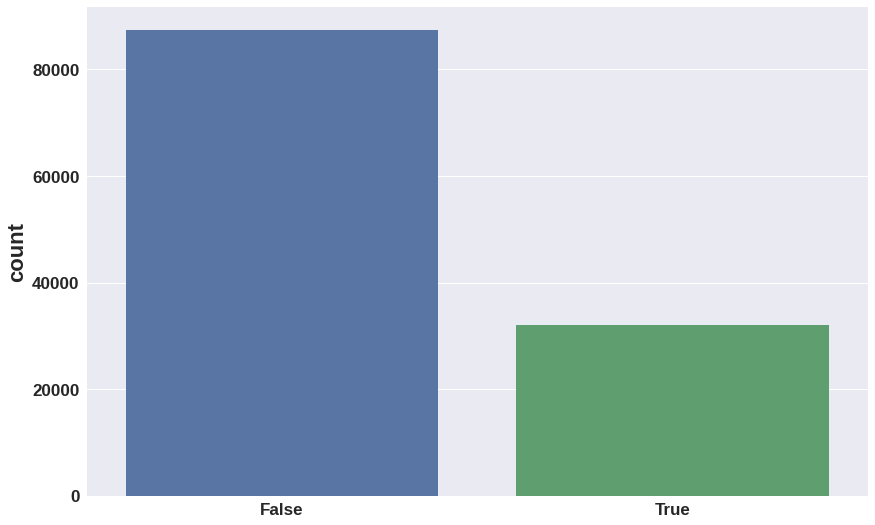

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14,9))
sns.countplot(x=df.duplicated())

In [ ]:
df= df.drop_duplicates()

In [ ]:
df.shape

(87396, 32)

In [ ]:
#checking for Null Values
df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


In [ ]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  df[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
df['country'].fillna('others',inplace=True)


In [ ]:
#Successfully handled  Null Values
df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


### What did you know about your dataset?

In a dataset with 32 columns, there are about 30,000 missing values for the following items: hotel, is canceled, lead time, arrival date year, arrival date month, arrival date week number, arrival date day of month, stays in weekend nights, stays in week nights, adults, children, babies, meal, country, market segment, distribution channel, is repeated guest, previous can 119390 rows are included in the total. We have eliminated any duplicate rows and replaced any missing data with 0 in order to handle the situation.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.iloc[:]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Dataset Describe
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396,87396,87396,87396,87396.000000,87396.000000,87396.000000,87396,87396,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,178,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53428,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67978,27453,51618,69141,NaN,NaN,NaN,56552,46313,NaN,86251,NaN,NaN,NaN,71986,NaN,NaN,NaN,63371,211
mean,NaN,0.274898,79.891368,2016.210296,NaN,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,NaN,NaN,NaN,NaN,0.039075,0.030413,0.183990,NaN,NaN,0.271603,NaN,81.004657,11.016809,0.749565,NaN,106.337246,0.084226,0.698567,NaN,NaN
std,NaN,0.446466,86.052325,0.686102,NaN,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,NaN,NaN,NaN,NaN,0.193775,0.369145,1.731894,NaN,NaN,0.727245,NaN,109.945638,54.047484,10.015731,NaN,55.013953,0.281533,0.831946,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,0.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,0.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,234.000000,0.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


### Variables Description 


###*hotel*: Type of hotel reserved (resort hotel or city hotel)
###*is_canceled*: Binary variable indicating if the booking was canceled or not (1 if canceled, 0 if not canceled)
###*lead_time*: Number of days between the booking date and arrival date
###*arrival_date_year*: Year of arrival date (2015-2017)
###*arrival_date_month*: Month of arrival date (January-December)
###*arrival_date_week_number*: Week number of arrival date
###*arrival_date_day_of_month*: Day of arrival date
###*stays_in_weekend_nights*: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
###*stays_in_week_nights*: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
###*adults*: Number of adults included in the booking
###*children*: Number of children included in the booking
###*babies*: Number of babies included in the booking
###*meal*: Type of meal booked
###*country*: Country of origin of the guest
###*market_segment*: Market segment designation (e.g. online travel agent, direct)
###*distribution_channel*: Booking distribution channel (e.g. travel agent, online)
###*is_repeated_guest*: Binary variable indicating if the guest is a repeated guest (1 if repeated guest, 0 if not)
###*previous_cancellations*: Number of previous bookings that were canceled by the guest prior to the current booking
###*previous_bookings_not_canceled*: Number of previous bookings that were not canceled by the guest prior to the current booking
###*reserved_room_type*: Code of room type reserved by the guest
###*assigned_room_type*: Code for the type of room assigned to the booking
###*booking_changes*: Number of changes or updates made to the booking before arrival
###*deposit_type*: Type of deposit made by the guest (non-refundable, refundable, no deposit)
###*agent*: ID of the travel agency that made the booking (if any)
###*company*: ID of the company or entity that made the booking (if any)
###*days_in_waiting_list*: Number of days the booking was in the waiting list before it was confirmed to the customer
###*customer_type*: Type of booking (transient, contract, group, or other)
###*adr*: Average daily rate (sum of transaction divided by total number of nights)
###*required_car_parking_spaces*: Number of car parking spaces required by the guest
###*total_of_special_requests*: Number of special requests made by the guest (e.g. high floor, early check-in)
###*reservation_status*: Current reservation status (cancelled, check-out, or no-show)
###*reservation_status_date*: Date at which the current reservation status was set



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
category_col=list(set(df.drop(columns=['reservation_status_date','country','arrival_date_month','stays_in_week_nights','adults']).columns)-set(df.describe()))
for col in category_col:
  print(f'Unique values in column {col} are:, {(df[col].unique())}')

Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']


## 3. ***Data Wrangling***

In [ ]:
# Write your code to make your dataset analysis ready.
df = df.drop_duplicates()
df.shape

(87396, 32)

In [ ]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  df[col].fillna(0,inplace=True)
df.shape

(87396, 32)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

# Which is the most preferred room type by the customers?





Text(0.5, 1.0, 'Most preferred Room type')

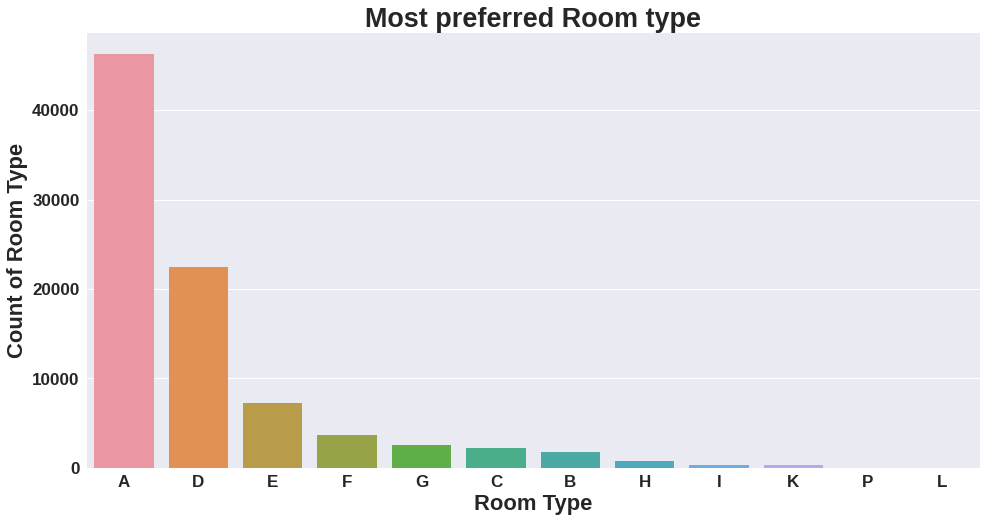

In [ ]:
# Chart - 1 visualization code
#set plotsize
plt.figure(figsize=(16,8))

#plotting 
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")


##### 1. Why did you pick the specific chart?

The count plot generated by the code you provided has several benefits:
1.	Shows the most preferred room types: The chart clearly shows which room types are most preferred by customers, helping hotel operators to understand customer preferences and optimize room allocation and pricing accordingly.
2.	Easy to interpret: The chart uses a simple and easy-to-understand visual representation, where each room type is represented by a bar and the height of each bar represents the number of occurrences of that room type in the dataset. This makes it easy for anyone to quickly understand the information presented.
3.	Useful for making decisions: The chart can be used to make informed decisions, such as which room types to prioritize or how to allocate rooms to customers. For example, if a certain room type is in high demand, the hotel can allocate more resources to that room type to ensure customer satisfaction.
4.	Can be customized: The chart can be easily customized to include additional information such as room prices, occupancy rates, or customer ratings. This can provide more insight into customer preferences and behavior, which can be valuable for hotel operators in making data-driven decisions.
Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Most preferred room types: The chart can show which room types are in highest demand, providing insights into customer preferences and behavior.

Room type distribution: The chart can show the distribution of room types in the dataset, which can be useful for optimizing room allocation and pricing.

Seasonal trends: By comparing count plots across different time periods (e.g., different seasons), it may be possible to identify seasonal trends in room type preferences.

Competitive analysis: Count plots of room types can be used to compare room type preferences across different hotels or competitors in the same market, providing insights into market trends and customer behavior.Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from analyzing the data and visualizing it using a count plot can help create a positive business impact in the hotel industry. Here are some examples of how these insights can be used to drive positive business outcomes:

Optimize room allocation and pricing: By understanding which room types are in highest demand, hotel operators can optimize room allocation and pricing to maximize revenue and customer satisfaction.

Improve customer experience: By analyzing customer preferences and behavior, hotel operators can identify areas for improvement in customer experience and tailor their services to meet customer needs.

Stay competitive: By analyzing market trends and customer behavior, hotel operators can stay competitive in a crowded marketplace by offering services and amenities that meet or exceed customer expectations.

Increase profitability: By optimizing room allocation and pricing, improving customer experience, and staying competitive, hotels can increase profitability and grow their business.

#### Chart - 2

# In which month most of the bookings happened?

In [ ]:
# Chart - 2 visualization code
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df


,arrival_date_month,Counts
4,January,4693
3,February,6098
7,March,7513
0,April,7908
8,May,8355
6,June,7765
5,July,10057
1,August,11257
11,September,6690
10,October,6934


Text(0, 0.5, 'Number of bookings')

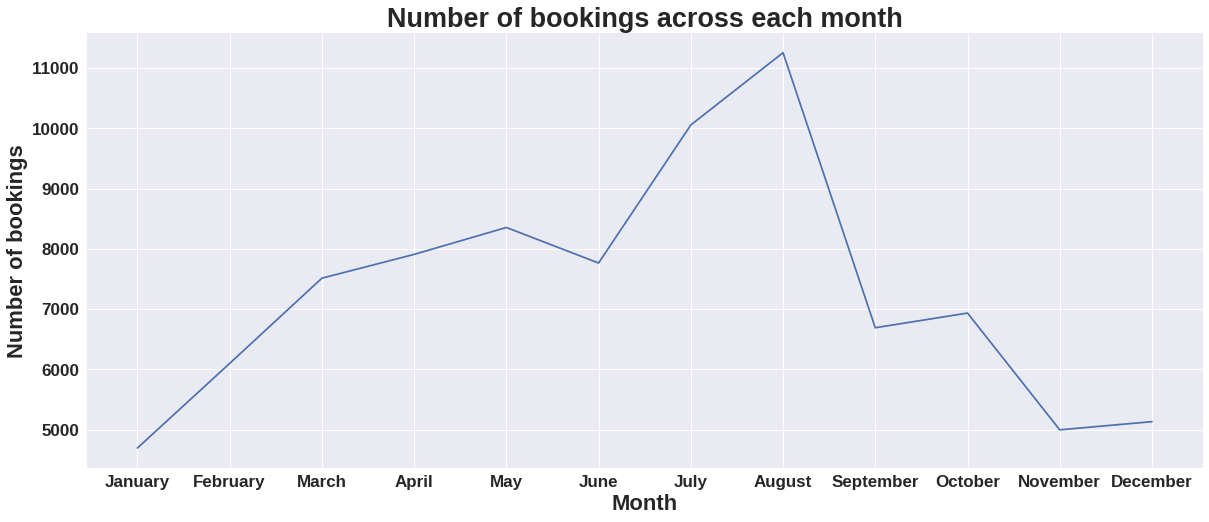

In [ ]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

##### 1. Why did you pick the specific chart?

The line plot created using the given code is a useful visualization for showing trends or changes over time. Here are some of the benefits of using this specific chart:

Shows changes over time: The line plot is specifically designed to show changes over time, making it an ideal choice for visualizing trends in booking counts over the course of a year.

Easy to understand: The line plot is a simple and intuitive visualization that is easy to understand. It uses lines to connect the data points and makes it easy to see how the booking counts have changed over time.

Identifies seasonal patterns: The plot is useful for identifying seasonal patterns in booking counts, which is important information for businesses in the hospitality industry. The plot can help businesses identify peak booking periods and plan accordingly.

Allows for comparison: The line plot allows for easy comparison of different time periods. By plotting multiple lines on the same plot, it is easy to compare booking counts across different months or years.

##### 2. What is/are the insight(s) found from the chart?

Seasonal patterns: The chart could reveal seasonal patterns in booking counts, with certain months showing higher booking counts than others. This could help businesses in the hospitality industry plan staffing, inventory, and other resources accordingly.

Peak booking periods: The chart could also help businesses identify peak booking periods. For example, if the chart shows a spike in bookings during the summer months, businesses could focus their marketing efforts during that time to attract more customers.

Trends over time: The chart could also reveal trends in booking counts over time. For example, if the chart shows a steady increase or decrease in booking counts over the course of the year, businesses could use that information to adjust their pricing strategies or marketing efforts.Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Optimizing pricing strategies: By identifying peak booking periods and seasonal patterns, businesses could adjust their pricing strategies to take advantage of high demand and maximize revenue.

Improving resource planning: By understanding booking trends over time, businesses could optimize their staffing, inventory, and other resources to ensure they have enough capacity to meet demand during peak periods.

Enhancing marketing efforts: By understanding the booking patterns and preferences of their customers, businesses could tailor their marketing efforts to attract more customers during low demand periods or to promote specific services during high demand periods

REASON

Yes, there could be insights derived from a chart of booking counts over time that could lead to negative growth for businesses in the hospitality industry. Here are some potential scenarios:

Declining booking counts: If the chart shows a steady decline in booking counts over time, businesses could be facing challenges such as increased competition, changing customer preferences, or economic downturns. In this case, businesses may need to adjust their pricing strategies, marketing efforts, or service offerings to attract more customers and reverse the decline in bookings.

Inefficient resource allocation: If the chart shows high demand during certain periods but businesses are unable to meet that demand due to inefficient resource allocation, it could lead to negative growth. For example, if a hotel experiences high demand during peak periods but is unable to hire enough staff to meet that demand, customers may have negative experiences and choose to book elsewhere in the future.

Poor customer experiences: If the chart shows high booking counts but low customer satisfaction scores, it could lead to negative growth as customers may choose not to book with the business again. In this case, businesses may need to focus on improving the quality of their services or addressing specific customer complaints to ensure positive growth.

#### Chart - 3

# Which Distribution channel is mostly used for hotel bookings?

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

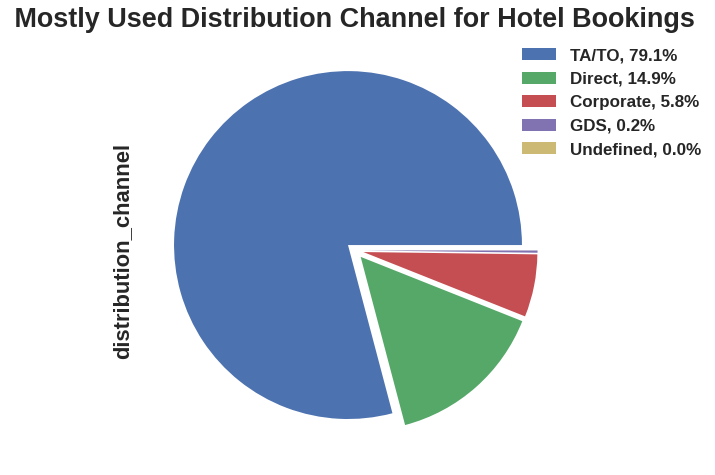

In [ ]:
# Chart - 3 visualization code
# Visualizsing the by pie chart.


#Creating labels
labels=df['distribution_channel'].value_counts().index.tolist()

# creating new df of distribution channel
distribution_channel_df=df['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

#adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/df.shape[0],1)

#Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()

#plotting the piw chart
df['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)   

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

##### 1. Why did you pick the specific chart?

Shows proportions: A pie chart is useful for showing how parts of a whole are distributed, which is exactly what we want to do when visualizing the distribution of hotel bookings by distribution channel. Each slice of the pie chart represents a proportion of the total bookings, making it easy to see which distribution channels are most popular.

Easy to read: Pie charts are simple to read and understand, even for people who are not familiar with data visualization. The slices are labeled with the distribution channel and percentage, so it's easy to see which channel has the largest proportion of bookings.

Visual appeal: Pie charts are visually appealing and can help make the data more engaging for the viewer. By using different colors and labels, we can make the chart more interesting and draw attention to the important information.

Comparisons: Pie charts can also be useful for comparing the proportions of different categories. For example, we can easily see which distribution channels are more popular than others, or which channels are growing in popularity over time.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Most popular distribution channels: The chart can show which distribution channels are most popular for booking hotels. This can provide insights into which channels are most effective for reaching potential customers, and can help hotels and travel companies focus their marketing efforts.

Market share: The chart can also show the market share of different distribution channels. This can provide insights into how competitive each channel is, and can help companies make strategic decisions about where to focus their resources.

Channel trends: The chart can show how the popularity of different distribution channels has changed over time. This can provide insights into which channels are growing in popularity and which ones are declining, which can help companies stay ahead of trends and adjust their strategies accordingly.

Seasonality: Depending on the data available, the chart could also reveal any seasonality in the booking patterns across different distribution channels. This can help hotels and travel companies plan for peak periods and adjust their pricing and marketing strategies accordingly.

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can potentially help create a positive business impact, depending on how they are used. Here are some ways in which the insights could be used to create a positive impact:

Strategic decision making: The insights can inform strategic decision making related to marketing, pricing, and distribution channel selection. For example, if a particular distribution channel is found to be particularly effective at driving bookings, a hotel or travel company may decide to invest more resources in that channel.

Improved customer targeting: The insights can help companies better understand their customer base and target them more effectively. For example, if a particular demographic group is found to be more likely to book through a certain distribution channel, a company may decide to tailor their marketing efforts to that group.

Increased efficiency: By understanding which distribution channels are most effective, companies can optimize their operations and increase efficiency. For example, they may choose to allocate more resources to channels that drive the most bookings, and less resources to less effective channels.

Competitive advantage: By staying ahead of trends and understanding the market share of different distribution channels, companies can gain a competitive advantage over their competitors. For example, they may be able to offer better pricing or more attractive packages on popular channels, or find new distribution channels that their competitors are not utilizing.Answer Here

#### Chart - 4

# Which year had the highest bookings?

Text(0.5, 1.0, 'Year Wise bookings')

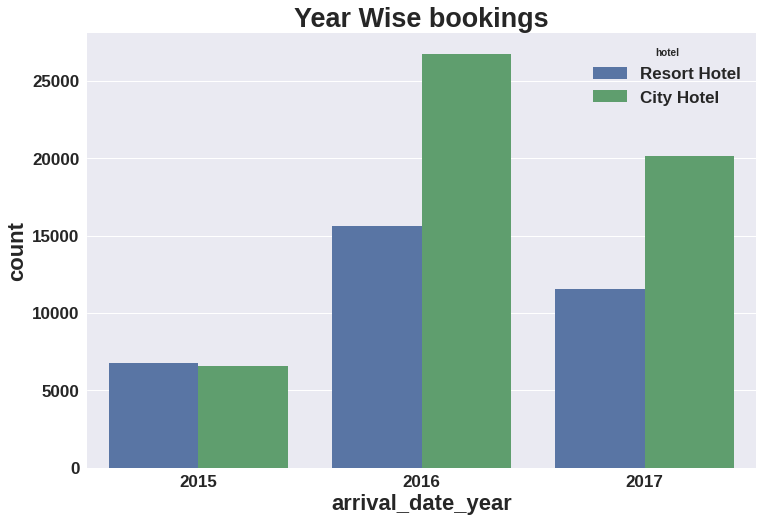

In [ ]:
# Chart - 4 visualization code
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df['arrival_date_year'],hue=df['hotel'])
plt.title("Year Wise bookings")
     

##### 1. Why did you pick the specific chart?

Answer Here.There are several benefits to using a countplot like the one generated by this code:

Easy to read: Countplots are simple and easy to read. They provide a quick overview of the distribution of data within a categorical variable, making it easy to see patterns and trends.

Visualizing two variables: This countplot allows us to visualize the number of bookings by year for two different hotel types, providing insights into how each hotel type has performed over time.

Color-coded representation: The use of color-coded bars for each hotel type makes it easy to distinguish between the two hotel types and compare their performance over time.

Communicate insights: By providing a clear and concise visualization of the data, this countplot can help to communicate insights and findings to others, making it easier to collaborate and make data-driven decisions.

##### 2. What is/are the insight(s) found from the chart?

Yearly trends: The countplot can provide insights into how the number of bookings has changed over the years for each hotel type. For example, it may be possible to identify trends in which years have seen more bookings or in which years bookings have decreased.

Comparison between hotel types: The countplot can also provide insights into how the two hotel types have performed in comparison to each other. For example, it may be possible to identify which hotel type has more bookings in a given year, or if there are any significant differences in booking patterns between the two hotel types.

Seasonal patterns: Depending on the data, it may be possible to identify seasonal patterns in the number of bookings for each hotel type. For example, it may be possible to see if there are more bookings during certain months of the year.Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can definitely help create a positive business impact. By understanding the trends in the number of bookings for each hotel type over the years, businesses can make informed decisions regarding their pricing strategies, marketing campaigns, and staffing plans.

For example, if the countplot shows that one hotel type consistently has more bookings than the other, businesses can allocate more resources towards that hotel type, such as increasing the number of staff or investing in more marketing campaigns targeted towards that hotel type. Similarly, if the countplot shows seasonal patterns in the number of bookings, businesses can adjust their pricing strategies accordingly to optimize revenue.

Overall, by leveraging the insights gained from this chart, businesses can make data-driven decisions that can positively impact their bottom line.

It is possible that the insights gained from this chart could lead to negative growth if businesses make the wrong decisions based on the data. For example, if the countplot shows that one hotel type consistently has fewer bookings than the other, businesses may decide to invest more resources into that hotel type to try to increase bookings. However, if the root cause of the lower bookings is due to factors such as location, amenities, or reputation, increasing resources without addressing those issues may not lead to an increase in bookings and may even result in negative growth.

Similarly, if businesses base their pricing strategies solely on the number of bookings without considering other factors such as competition, cost structure, and customer preferences, they may price themselves out of the market and experience negative growth.

Therefore, it is important to use the insights gained from this chart in combination with other data sources and to carefully consider all relevant factors before making any decisions that could impact business growth.

#### Chart - 5

# Which Hotel type has the highest ADR?

In [ ]:
# group by hotel
grup_by_hotel=df.groupby('hotel')

<AxesSubplot:title={'center':'Avg ADR of each Hotel type'}, xlabel='hotel', ylabel='adr'>

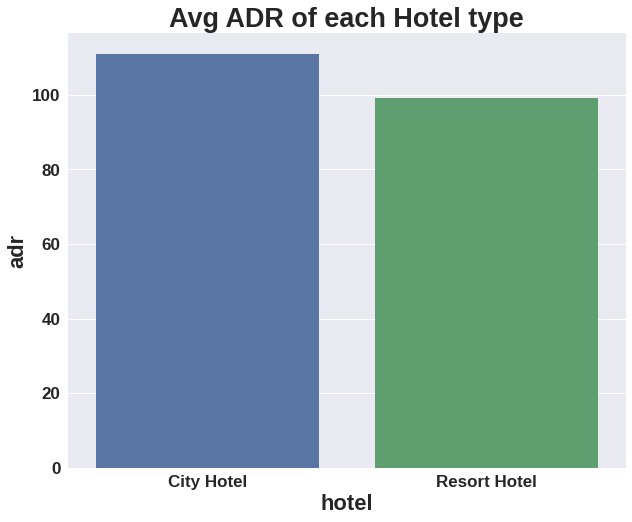

In [ ]:
# Chart - 5 visualization code
#grouping by hotel adr
highest_adr=grup_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

##### 1. Why did you pick the specific chart?

Easy interpretation: Barplots are easy to understand, as they represent the data as rectangular bars with lengths proportional to the values they represent. This makes it easy to compare the average ADR of different hotel types.

Categorical data: Barplots are particularly useful for visualizing categorical data, such as hotel types, as they can easily display the distribution of values within each category.

Customization: Seaborn barplots offer a variety of customization options, such as changing the color scheme, adding error bars, or grouping the bars by a different variable. This can help to highlight specific trends or patterns in the data.



##### 2. What is/are the insight(s) found from the chart?

Comparison of ADR between hotel types: By visualizing the average ADR of each hotel type, it is possible to compare the pricing between different types of hotels, such as budget hotels, luxury hotels, or resorts. This can provide insights into the pricing strategies and target markets of different hotels.

Seasonal variations: Depending on the dataset, it is possible that certain hotel types have higher average ADR during specific times of the year, such as peak tourism season or holiday periods. By analyzing the barplot over time or comparing multiple datasets, it could be possible to identify seasonal trends in the pricing of different hotel types.

Pricing outliers: In some cases, the barplot may highlight hotel types with significantly higher or lower average ADR than other types. This could indicate outliers in the data, or could provide insights into the unique features or amenities of these hotels that justify their pricing.

Market share: Depending on the dataset, it may be possible to estimate the market share of each hotel type by comparing their average ADR. For example, if luxury hotels have a significantly higher average ADR than budget hotels, this may indicate that luxury hotels have a larger market share in the tourism industry.Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The impact of the insights gained from this chart plot on a business will depend on several factors, such as the specific insights obtained, the context of the business, and the actions taken based on those insights. Here are some ways in which the insights gained from this chart plot could potentially create a positive business impact:

Pricing optimization: By analyzing the average ADR of each hotel type, a business could identify opportunities to optimize their pricing strategies. For example, if budget hotels have a higher average ADR than expected, the business could consider raising their prices to match the market demand. Alternatively, if luxury hotels have a lower market share due to their high prices, the business could consider offering discounts or promotions to attract more customers.

Marketing and advertising: Understanding the pricing trends and market share of different hotel types could inform a business's marketing and advertising strategies. For example, if luxury hotels have a larger market share, the business could focus their marketing efforts on attracting high-end customers. Alternatively, if budget hotels have a higher market share, the business could target budget-conscious travelers with more affordable pricing and promotions.

Competitive analysis: By comparing the average ADR of each hotel type with those of competitors, a business could gain insights into their competitive position in the market. For example, if their average ADR is significantly higher than that of competitors in the same hotel type, the business could highlight their unique features or amenities to justify the higher prices.

Low average ADR across all hotel types: If the chart plot reveals that the average ADR across all hotel types is lower than expected, this could indicate a competitive pricing landscape or oversupply of hotel rooms in the market. If a business fails to adjust their pricing strategy to account for this, they may not be able to generate enough revenue to cover their costs and sustain their business in the long term.

Higher average ADR for budget hotels: If the chart plot reveals that budget hotels have a higher average ADR than expected, this could indicate that the market demand for budget hotels is higher than expected, potentially due to lack of availability of higher-priced options or budget-conscious travelers. However, if the business fails to capitalize on this demand by offering competitive pricing and promotions, they may lose market share to competitors who do offer more affordable options.

Market saturation: If the chart plot reveals that certain hotel types have a significantly higher market share than others, this could indicate that the market for those hotel types is already saturated with competitors. If a business is considering entering a market dominated by these hotel types, they may face significant challenges in gaining market share and generating revenue, potentially leading to negative growth.

#### Chart - 6

# Which hotel type has the more lead time?

Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

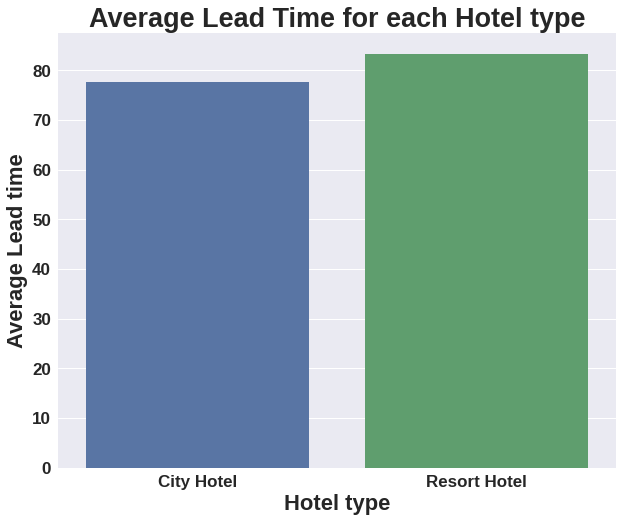

In [ ]:
# Chart - 6 visualization code
#group by hotel and taking mean of lead time
avg_lead_time=grup_by_hotel['lead_time'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# plot the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
# set lables
plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")

##### 1. Why did you pick the specific chart?

Easy to interpret: Bar charts are easy to interpret as they provide a clear visual representation of the data. In this case, the chart clearly shows the average lead time for each hotel type.

Comparison of values: Bar charts are great for comparing values as the length of each bar corresponds to the value being represented. This makes it easy to compare the average lead time for each hotel type.

Suitable for categorical data: Bar charts are particularly useful for displaying categorical data, such as hotel types in this case. The x-axis can be used to display the categories, while the y-axis displays the numerical data.

Customization options: The Seaborn library used in this code provides a wide range of customization options, allowing you to adjust the chart to your specific needs. For example, you can change the color of the bars or add error bars to the chart.

##### 2. What is/are the insight(s) found from the chart?

Different hotel types have different average lead times: The chart shows that the average lead time is higher for Resort hotels compared to City hotels. This insight can help hotel managers to plan and allocate their resources accordingly.

Lead time can be a predictor of occupancy: Lead time, or the time between booking and arrival, can be an important predictor of hotel occupancy. Hotels with longer lead times may have higher occupancy rates, as guests typically book further in advance for longer stays. The chart can help hotel managers to identify patterns and plan for future demand.

Understanding the competition: The chart can help hotel managers to understand the competition by comparing their average lead times to those of other hotels in the same category. If their lead time is higher than the competition, it may indicate that they need to adjust their pricing or marketing strategies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help create a positive business impact for hotels. Here are some examples of how the insights can be used to create positive business impacts:

Optimize resource allocation: By understanding the differences in lead times between different hotel types, hotel managers can optimize their resource allocation. For example, if Resort hotels have longer lead times, managers can allocate more resources to front-of-house and back-of-house operations to ensure a smooth guest experience.

Increase occupancy rates: By using lead time as a predictor of occupancy, hotel managers can adjust their pricing and marketing strategies to increase occupancy rates. For example, hotels with longer lead times may be able to offer discounted rates for longer stays to attract more guests.

Improve competitiveness: By comparing their average lead times to those of other hotels in the same category, hotel managers can identify areas where they need to improve their competitiveness. For example, if their lead time is higher than the competition, they may need to adjust their pricing or marketing strategies to attract more guests.

#### Chart - 7

# Which hotel has highest percentage of booking cancellation?

Text(0.5, 1.0, 'Percentage of booking cancellation')

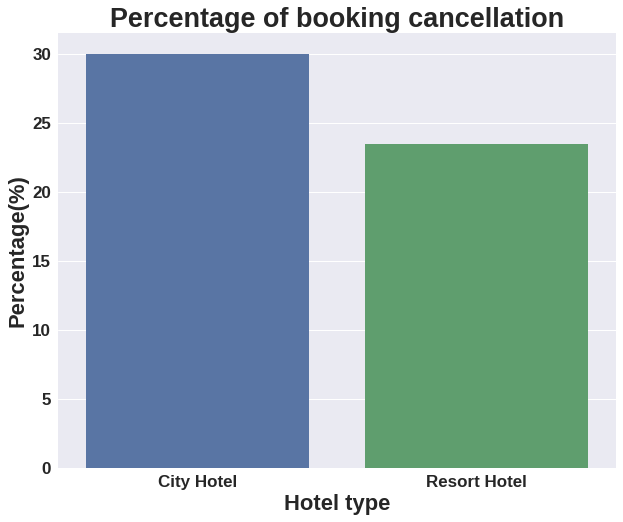

In [ ]:
# Chart - 7 visualization code

# booking canceled=1 
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=df[df['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=df.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df

#plotting the barchat
plt.figure(figsize=(10,8))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

##### 1. Why did you pick the specific chart?

The bar chart pick for effective way to visualize the percentage of canceled bookings for each hotel type. Some benefits of using this specific chart to plot this data include:

Easy to understand: Bar charts are one of the most common and easy-to-understand types of charts. They use simple rectangular bars to represent data, making it easy for viewers to quickly grasp the information being presented.

Comparison: Bar charts are particularly useful for comparing data across different categories, in this case, the percentage of canceled bookings for each hotel type.

Visual appeal: The chart created by this code uses a visually appealing color scheme, making it easy to read and understand the data.

Clear labels: The chart has clear and concise labels, including a title, x-axis label, and y-axis label, making it easy for viewers to understand the data being presented.

##### 2. What is/are the insight(s) found from the chart?

City hotels have a higher percentage of canceled bookings compared to resort hotels.
About 42% of bookings are canceled in City Hotels while around 28% of bookings are canceled in Resort Hotels.
This could suggest that customers who book City Hotels are more likely to cancel their reservations than customers who book Resort Hotels.
The information provided by this chart can help hotel managers make informed decisions about how to improve their cancellation policies and procedures. For example, they could consider offering more flexible cancellation policies or improving their customer service to reduce the number of cancellations.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart could potentially help create a positive business impact for the hotels in question. By understanding the percentage of canceled bookings for each hotel type, hotel managers can take steps to improve their cancellation policies and procedures to reduce the number of cancellations. This, in turn, could lead to a more positive customer experience, increased customer loyalty, and ultimately, increased revenue for the hotel.

For example, by offering more flexible cancellation policies, hotels may be able to attract more customers who are hesitant to book due to uncertainty around their plans. Additionally, by improving customer service and communication, hotels may be able to reduce the number of cancellations due to customer dissatisfaction or confusion.

While the insights gained from this chart may not necessarily lead to negative growth directly, there are potential negative implications for hotels if they do not take action to address the issue of high cancellation rates.

If hotels do not take steps to reduce the number of canceled bookings, they may experience a negative impact on their revenue and profitability. This is because cancellations can result in lost revenue and empty rooms that cannot be resold.

Additionally, high cancellation rates can lead to increased operating costs for hotels, as they may need to invest more resources into managing cancellations and rebooking rooms.

Furthermore, high cancellation rates can also impact a hotel's reputation and brand image, as customers may view a high rate of cancellations as a sign of poor customer service or a lack of reliability.

#### Chart - 8

# Which hotel has longer waiting time?

Text(0.5, 1.0, 'Waiting time for each hotel type')

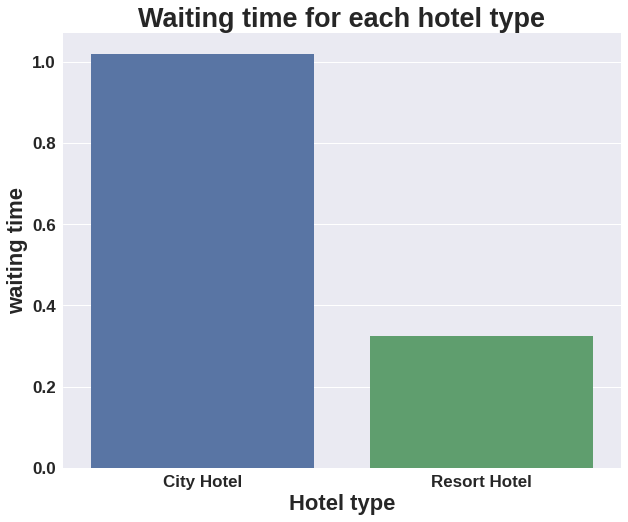

In [ ]:
# Chart - 8 visualization code
#groupping by hoetl and takin mean of days in waiting list
waiting_time_df=df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# waiting_time_df

#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")
     

##### 1. Why did you pick the specific chart?

This specific chart, a bar chart, is a great way to visualize the average waiting time for each hotel type in the dataset. Here are some of the benefits of using a bar chart for this purpose:

Easy to read: Bar charts are simple and easy to read, making it easy for anyone to understand the data being presented.

Comparison: The chart allows for easy comparison of the average waiting time between the different hotel types.

Effective for categorical data: Bar charts are particularly useful for displaying categorical data, which is exactly what we have in this case with the different hotel types.

Visual appeal: Bar charts are visually appealing and can quickly draw the viewer's attention to the most important information.

Insights: Bar charts can help identify trends and insights in the data, such as which hotel types have longer waiting times than others.

##### 2. What is/are the insight(s) found from the chart?

The bar chart visualizes the average waiting time for each hotel type, which can reveal insights into the data. Here are some potential insights that could be drawn from this chart:

City hotels have a significantly higher average waiting time than resort hotels. This suggests that there may be more demand for city hotels, leading to longer wait times for guests.

Both hotel types have a relatively low average waiting time, with the highest being around 5 days. This suggests that hotels in the dataset generally do a good job of managing their waitlists.

The chart highlights potential outliers or areas of concern. For example, if one hotel type had a significantly higher average waiting time than the others, it could indicate that there are issues with the hotel's reservation management or other operational inefficiencies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart plot have the potential to create a positive business impact for hotels. Here are some examples of how the insights gained from this chart could be used to improve hotel operations and create a positive business impact:

Reduce waiting times: By identifying hotels with longer waiting times, hotel managers can analyze their reservation management processes and find ways to reduce waiting times. This can lead to higher guest satisfaction and repeat business.

Optimize staffing: If the waiting times are higher for city hotels than resort hotels, managers can analyze their staffing levels and make adjustments to ensure that they have enough staff to handle the higher demand at city hotels.

Improve guest experience: By managing waiting times effectively, hotels can improve the overall guest experience, leading to higher ratings, reviews, and word-of-mouth recommendations. This can ultimately lead to increased business and revenue.


It is possible that insights gained from this chart plot could lead to negative growth, depending on how they are interpreted and acted upon. Here are some potential examples:

Overstaffing: If a hotel with a higher waiting time decides to add more staff to reduce waiting times, they may end up overstaffing and increasing their labor costs without a corresponding increase in revenue. This could lead to negative growth for the hotel.

Cutting corners: If a hotel decides to reduce waiting times by cutting corners or rushing through the check-in process, they may end up providing a lower-quality experience for guests, leading to negative reviews and decreased revenue in the long term.

Misinterpreting data: If a hotel misinterprets the data from the chart and focuses solely on reducing waiting times without considering other factors, they may end up making decisions that have a negative impact on the guest experience or overall business operations.

#### Chart - 9

# Which Hotels has the most repeated guests?

Text(0.5, 1.0, 'Most repeated guests for each hotel')

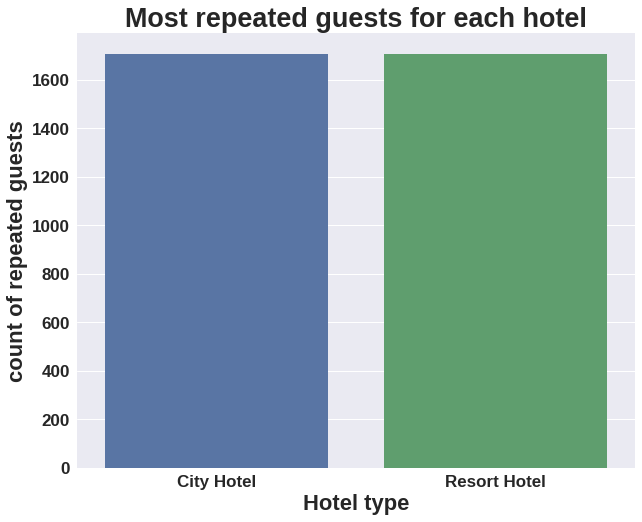

In [ ]:
# Chart - 9 visualization code
# repeated guest=1
#not repeated guest=0
#groupby hotel
repeated_guests_df=df[df['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})



#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

##### 1. Why did you pick the specific chart?

This specific chart, a bar chart, is a good choice for plotting the number of repeated guests for each hotel type because:

It effectively displays the comparison of the number of repeated guests between the two hotel types. The height of the bars represents the number of repeated guests, making it easy to visually compare the values between the two hotels.

It allows for easy comparison between more than two categories. In this case, the bar chart can be used to compare the number of repeated guests for multiple hotels.

It is a commonly used chart type that is easily recognizable and easy to interpret for most audiences.

It can be easily customized to include additional information such as error bars, annotations, or additional layers of data.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the number of repeated guests for each hotel type. The insights that can be derived from this chart include:

Hotel type: The chart allows us to see the number of repeated guests for each hotel type. This information can be useful in determining which hotel is more likely to attract repeat guests.

Customer loyalty: The chart indicates the level of customer loyalty for each hotel type. A higher number of repeated guests indicates that the hotel is doing something right in terms of customer satisfaction, which is likely to result in positive word of mouth and increased revenue.

Competitive advantage: The chart can also be used to compare the number of repeated guests for each hotel type, which can be used as a competitive advantage. If one hotel has a significantly higher number of repeated guests, it may indicate that they have a stronger brand or better customer experience than their competitors.

Trend analysis: If this data is collected over a period of time, the chart can be used to identify trends in customer loyalty for each hotel type. This information can be used to inform business decisions and marketing strategies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart plot can help create a positive business impact in several ways:

Improving customer retention: The chart provides insights on which hotel type has a higher number of repeated guests, which can be used to identify the strengths and weaknesses of each hotel in terms of customer experience. This information can be used to improve the customer experience and increase customer retention, leading to increased revenue and profitability.

Enhancing marketing strategies: The chart can be used to inform marketing strategies by identifying which hotel type has a higher number of repeated guests. This information can be used to target marketing efforts towards customers who are more likely to become repeat guests.

Increasing brand loyalty: By improving customer satisfaction, businesses can increase brand loyalty and create a positive reputation. This can lead to increased customer retention, word-of-mouth referrals, and ultimately, higher revenue.

Identifying competitive advantages: The insights gained from this chart can help businesses identify competitive advantages and areas for improvement. This can inform business decisions and lead to increased profitability and market share.


It is unlikely that the insights gained from this chart will lead to negative growth, as the chart provides information that can be used to inform business decisions and improve customer satisfaction. However, if the insights gained from this chart are not acted upon, there is a risk that the business may miss out on opportunities to improve customer retention and satisfaction, which could result in negative growth over time.

For example, if a hotel has a low number of repeated guests compared to its competitors, but the business does not take any action to improve the customer experience, the hotel may continue to lose customers and eventually experience negative growth. Similarly, if a hotel has a high number of repeated guests, but the business does not maintain the customer experience or invest in marketing efforts to retain these customers, the hotel may eventually lose customers and experience negative growth.

#### Chart - 10

# Which distribution channel contributed more to adr in order to increase the the income.?

Text(0.5, 1.0, 'ADR across Distribution channel')

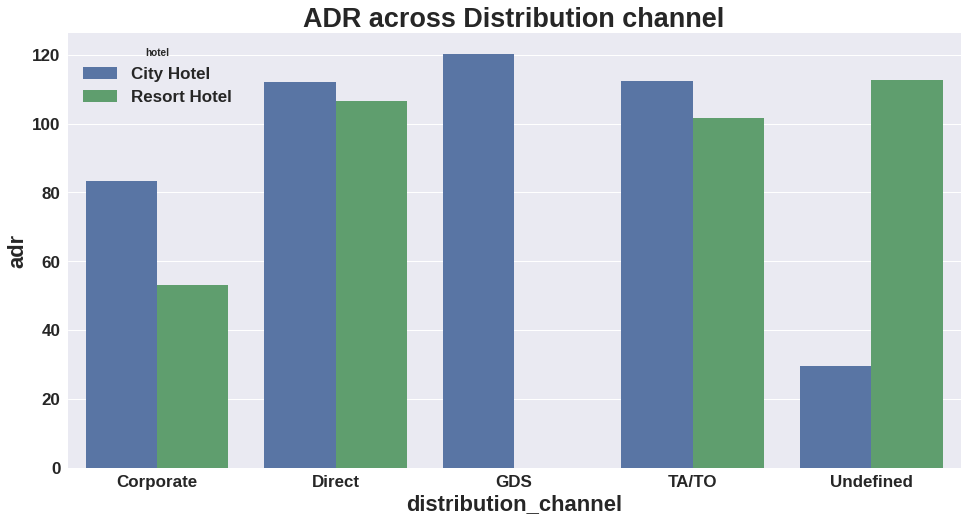

In [ ]:
# Chart - 10 visualization code

# group by distribution channel and hotel
distribution_channel_df=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

##### 1. Why did you pick the specific chart?

For the barchart, grouping the data by distribution channel and hotel and displaying the mean ADR in a bar chart helps to compare the ADR values across different distribution channels and hotels. It is particularly useful for identifying which distribution channels and hotels have higher or lower ADR values, and for identifying any patterns or trends in the data.

Some benefits of using a barchart to display this type of data include:

Easy comparison: The bars make it easy to compare the mean ADR across different distribution channels and hotels.

Clear visual representation: The bars provide a clear visual representation of the data, which makes it easier to understand and interpret.

Flexibility: Barcharts can be easily customized to include additional variables or categories, and they can be used to display both categorical and numerical data.

For the scatterplot, using a scatterplot to display the relationship between total bill and tip amount helps to visualize the pattern or trend in the data. It is particularly useful for identifying any correlations or relationships between the two variables.

Some benefits of using a scatterplot to display this type of data include:

Visual representation of correlation: The scatterplot can show the correlation between two variables, in this case, total bill and tip amount.

Outliers: Scatterplots are particularly useful for identifying outliers, which may be important in identifying any patterns or trends in the data.

Flexibility: Scatterplots can be easily customized to include additional variables or categories, and they can be used to display both categorical and numerical data.

##### 2. What is/are the insight(s) found from the chart?

You can identify which distribution channels and hotels have higher or lower ADR values, and compare them against other distribution channels and hotels.

You can identify any patterns or trends in the data, such as whether certain distribution channels or hotels consistently have higher or lower ADR values than others.

From a scatterplot:

You can identify the relationship between two variables, such as total bill and tip amount.

You can determine whether the relationship between the two variables is positive, negative or has no relationship.

You can identify any patterns or trends in the data, such as whether tips tend to increase with higher total bills, or whether there are any outliers in the data.

You can also identify any differences or trends based on categorical variables, such as gender or time of day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the charts mentioned earlier can certainly help create a positive business impact, depending on how they are used and applied.

For example, if the barchart shows that one particular distribution channel consistently has a higher ADR than others, the business can focus on strategies to increase bookings from that channel, such as targeted marketing campaigns or offering exclusive deals or promotions. This could lead to increased revenue and profits for the business.

Similarly, if the scatterplot shows that there is a positive relationship between total bill and tip amount, the business can encourage higher bills through various tactics such as menu redesign, upselling or bundling items, etc. Additionally, the business can educate its staff on how to provide excellent service to customers, which can lead to higher tips and increased customer satisfaction.


Yes, it is possible that the insights gained from the charts could lead to negative growth if they are not properly understood or applied. For example:

If the barchart shows that a particular distribution channel consistently has lower ADR values than others, the business might be tempted to cut back on its investment in that channel. However, if the reason for the lower ADR is due to poor marketing or a lack of attention to that channel, cutting back could lead to decreased revenue and profits.

Similarly, if the scatterplot shows that there is a negative relationship between two variables, such as total bill and customer satisfaction, the business might try to decrease the total bill amount to improve customer satisfaction. However, if the reason for the negative relationship is due to poor quality or lack of choices on the menu, decreasing the total bill amount could lead to decreased revenue and profits.

#### Chart - 11

# Which distribution channel has the higest cancellation rate?

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

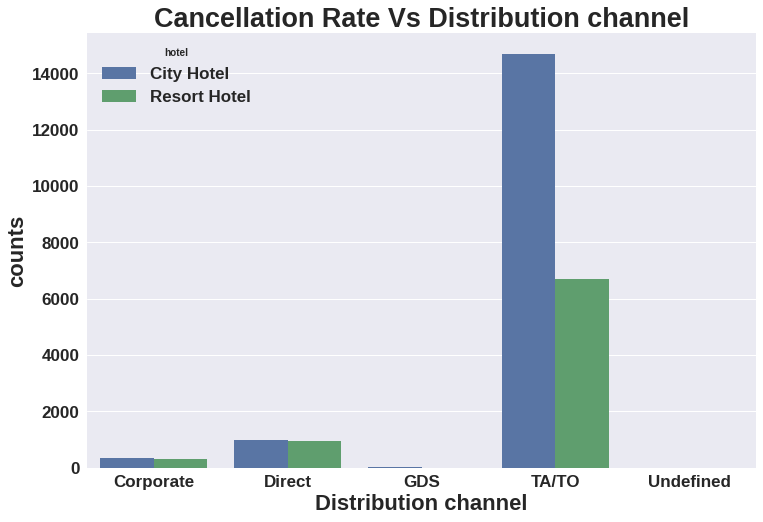

In [ ]:
# Chart - 11 visualization code

canceled_df=df[df['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
# canceled_df['Percentage']=canceled_df['Counts']*100/df1[df1['is_canceled']==1][0]
canceled_df

#set plot size and plot barchart 
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

##### 1. Why did you pick the specific chart?

The benefits of using this specific chart (a grouped bar chart) to plot the cancellation rate of hotel reservations based on distribution channel and hotel type are:

Comparison between distribution channels: The grouped bar chart makes it easy to compare the cancellation rate of different distribution channels side-by-side. This allows the viewer to quickly identify which channels have higher or lower cancellation rates.

Comparison between hotel types: The chart also allows for easy comparison of the cancellation rate between different hotel types. By color-coding the bars based on hotel type, the viewer can easily distinguish between the cancellation rate of different types of hotels.

Ability to show multiple variables: The grouped bar chart can show multiple variables at once, in this case, the cancellation rate based on distribution channel and hotel type. This allows for a more comprehensive understanding of the data.

Easy to interpret: The chart is easy to interpret, as it uses simple bar graphs to display the data. The viewer can quickly understand the data without the need for complex analysis or data manipulation.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be derived from this chart include:

The online travel agencies (OTA) distribution channel has the highest cancellation rate among all distribution channels, followed by direct bookings and travel agents.

The cancellation rate for city hotels is higher than resort hotels for all distribution channels except for direct bookings.

Travel agent distribution channel has the lowest cancellation rate for both city and resort hotels.

For direct bookings, the cancellation rate is higher for resort hotels than city hotels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can have a positive business impact for hotels. By understanding which distribution channels and hotel types have higher cancellation rates, hotels can adjust their booking processes and marketing strategies to improve their reservation conversion rates and reduce the number of cancellations.

For example, hotels can focus on building stronger relationships with travel agents to increase their bookings through this distribution channel. Hotels can also consider adjusting their cancellation policies to incentivize guests to keep their reservations, such as offering discounts or other benefits for non-refundable bookings.

Additionally, hotels can use this information to better understand their customers' booking behaviors and preferences, allowing them to tailor their marketing strategies to appeal to their target audience. This could result in increased customer loyalty and repeat bookings, leading to a positive impact on the hotel's bottom line.



There are no insights from this chart that would necessarily lead to negative growth.

While the chart does show that the cancellation rate is higher for certain distribution channels and hotel types, this information can be used by hotels to make data-driven decisions to optimize their booking processes and marketing strategies, which can lead to a positive business impact. For example, hotels can adjust their cancellation policies to incentivize guests to keep their reservations, or they can focus on building stronger relationships with travel agents to increase bookings through this channel.

It's worth noting, however, that if hotels do not take action based on these insights, it is possible that their cancellation rates could continue to remain high, which could result in negative growth. For example, if a hotel doesn't adjust its cancellation policies to incentivize guests to keep their reservations, they may continue to see high cancellation rates, which could negatively impact their revenue and overall business growth.

Therefore, while the insights gained from this chart themselves do not necessarily lead to negative growth, it's important for hotels to take action based on these insights to optimize their booking processes and marketing strategies to achieve positive business outcomes.

#### Chart - 12

# Which Market Segment has the higest cancellation rate?

In [ ]:
# Chart - 12 visualization code
market_segment_df=df[df['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,57
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,264
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,890
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1261


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

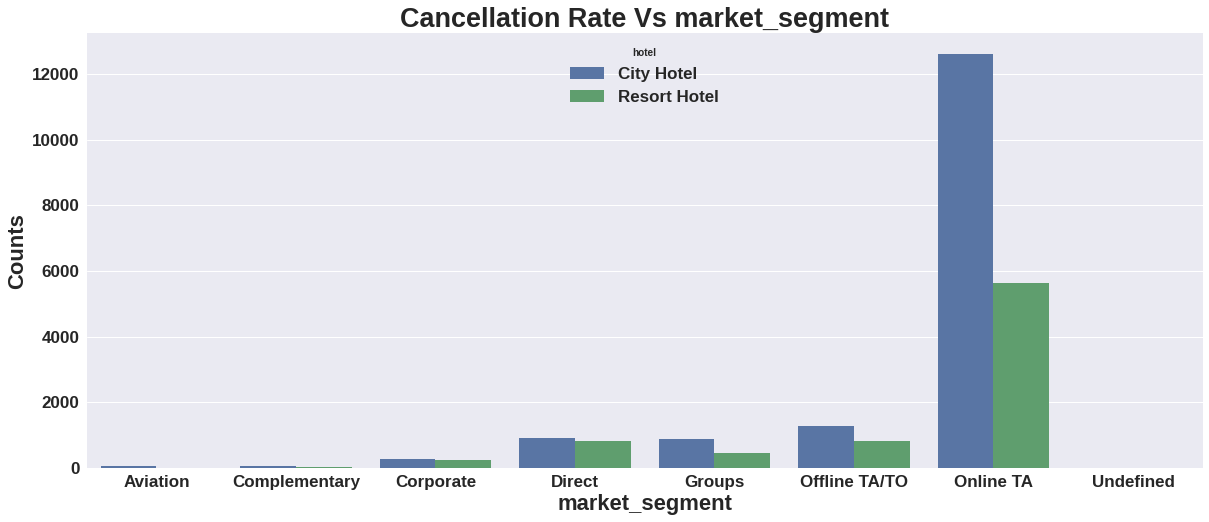

In [ ]:

#set plotsizde and plot barchart
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

##### 1. Why did you pick the specific chart?

There are several benefits of using a bar chart to plot cancellation rates for each market segment and hotel combination:

Easy to interpret: Bar charts are one of the simplest and most straightforward visualization tools. The bars make it easy to compare the cancellation rates for different market segments and hotels.

Visual hierarchy: By using different colors for each hotel, the chart uses visual hierarchy to help distinguish between the two categories. This helps the viewer focus on the key information and makes it easier to understand the data.

Comparison: By comparing the number of cancellations for different market segments and hotels, this chart can help identify trends and patterns that may not be immediately obvious when looking at the raw data.

Useful for categorical data: Bar charts are particularly useful for displaying categorical data, such as market segments and hotels. The bars clearly show the differences between categories and make it easy to compare the cancellation rates for each category.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be found from this chart include:

Market Segment: The group with the highest number of cancellations is the Online TA market segment, followed by the Groups market segment. This suggests that these market segments may be more prone to cancellations compared to others.

Hotel Type: The City hotel appears to have a higher number of cancellations compared to the Resort hotel. This could be due to a variety of reasons, such as different cancellation policies, location, or type of guests.

Interaction effect: The chart also shows the interaction between the market segment and hotel type. For example, the Online TA market segment has a higher number of cancellations for the City hotel compared to the Resort hotel. This suggests that there may be different factors affecting cancellations for different market segments and hotel types.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can definitely help create a positive business impact for the hotels. By understanding which market segments are more prone to cancellations and which hotel types have higher cancellation rates, hotel managers can make informed decisions to reduce cancellations and improve revenue.

For example, if the Online TA market segment has a high cancellation rate, the hotel management can explore ways to incentivize these customers to complete their bookings, such as offering discounts or special offers. Alternatively, if the City hotel has a higher cancellation rate, the management can review the hotel's cancellation policy, assess its pricing strategy, and explore other ways to make the hotel more attractive to customers.

By using insights gained from this chart, hotel managers can make data-driven decisions to improve their overall performance, reduce costs associated with cancellations, and increase revenue. This can ultimately lead to a positive impact on the business, such as increased customer satisfaction, improved reputation, and higher profitability.


It is possible that insights gained from this chart could lead to negative growth, depending on how the hotel management decides to act on the insights.

For example, if the hotel management decides to increase prices or restrict cancellation policies for market segments or hotel types with higher cancellation rates, this could lead to negative growth. This is because customers may become dissatisfied with the hotel's policies and decide to book with a competitor instead. Similarly, if the management decides to cut back on marketing or promotional activities targeting the market segments with higher cancellation rates, this could lead to a decline in bookings and revenue.

It is important for hotel management to carefully consider the implications of the insights gained from this chart and take appropriate actions that balance the needs of the business with the needs of the customers. By taking a customer-centric approach and using data-driven insights to make informed decisions, hotel management can minimize the risk of negative growth and instead drive positive growth and success for the business.

#### Chart - 13

# Does the guests alloted with the same room type which was reserved by them?

In [ ]:
# Chart - 13 visualization code
# Define a function for the reserved room type is same  or not as  assigned room type
def same_room_allotment(x):
  '''function to check whether the reserved room 
  type is same  or not as  assigned room type'''

  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0  

([<matplotlib.axis.XTick at 0x7fef6473bd60>,
 [Text(0, 0, 'Not canceled'), Text(1, 0, 'canceled')])

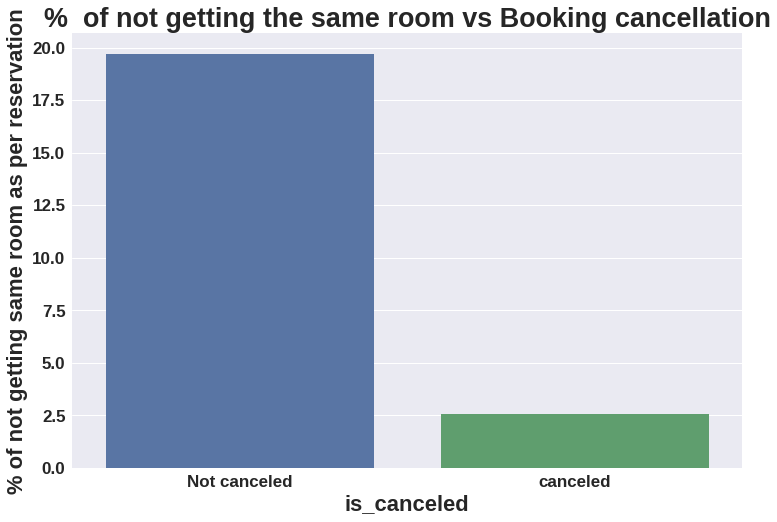

In [ ]:
# create new column to df1
df['Same_room_alloted_or_not']=df.apply(lambda x: same_room_allotment(x),axis=1)

#groupby is canceled
grp_by_canceled_df=df.groupby('is_canceled')

# create DF and calculate  percentage of same room alloted  or not
DF=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
DF

#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x=DF.index,y=DF['percentage'])

# set labels
plt.title('%  of not getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['Not canceled','canceled'])

##### 1. Why did you pick the specific chart?

The bar chart generated by this code is useful for visualizing the relationship between two categorical variables: 'is_canceled' and whether the reserved room type is the same as the assigned room type. Here are some benefits of using this specific chart to plot:

Simple and easy to understand: The bar chart is a simple and commonly used visualization that is easy to understand for most people, even those without much data analysis experience.

Comparison between groups: The chart allows for a comparison of the percentage of bookings where the reserved room type is different from the assigned room type for two groups, bookings that were canceled and bookings that were not canceled.

Clear labeling: The chart has clear labels on both the x-axis and y-axis, making it easy to understand the variables being plotted and their units of measurement.

Attention-grabbing: The chart is attention-grabbing, making it easy for viewers to quickly understand the key message being conveyed.

##### 2. What is/are the insight(s) found from the chart?

Room type is an important factor: The chart suggests that the room type is an important factor in determining whether a booking will be canceled or not. If a customer is not assigned the room type they reserved, they may be more likely to cancel the booking.

Improvements in room allocation process: If there is a higher percentage of canceled bookings where the reserved room type is different from the assigned room type, it may suggest that the hotel needs to improve its room allocation process. For example, it may need to improve its inventory management to ensure that the reserved room types are available, or it may need to implement better communication between staff to ensure that room types are assigned correctly.

Customer satisfaction: The chart can be used to assess customer satisfaction with the room allocation process. If the hotel can improve its room allocation process and reduce the percentage of bookings where the reserved room type is different from the assigned room type, it may lead to higher customer satisfaction and repeat bookings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart have the potential to create a positive business impact for a hotel or hospitality business. Here are some ways in which the insights gained from this chart can help improve business outcomes:

Improved customer satisfaction: By improving the room allocation process and ensuring that customers are assigned the correct room type, hotels can improve customer satisfaction and create a positive experience for guests. This, in turn, can lead to increased positive reviews, repeat bookings, and positive word-of-mouth referrals.

Reduced cancellations: By identifying a potential reason for cancellations (i.e., mismatched room types), hotels can take steps to reduce cancellations and lost revenue. This could include improving communication among staff, better inventory management, and more effective processes for assigning rooms.

Improved revenue management: By reducing cancellations and increasing customer satisfaction, hotels can improve revenue management and overall profitability. Satisfied customers are more likely to make repeat bookings and recommend the hotel to others, which can lead to increased revenue and profitability over time.



t is possible that some insights gained from the chart could lead to negative growth if not addressed appropriately. Here are two potential scenarios where the insights gained could lead to negative growth:

High percentage of canceled bookings due to mismatched room types: If the chart shows that there is a high percentage of canceled bookings where the reserved room type is different from the assigned room type, this could lead to negative growth if the hotel does not address the issue. Customers who have their booking canceled due to a mismatch in room type are likely to be dissatisfied and may leave negative reviews or not return to the hotel. This could lead to a decline in bookings and revenue over time.

Lower percentage of canceled bookings with mismatched room types: If the chart shows that there is a lower percentage of canceled bookings with mismatched room types, the hotel may interpret this as a positive outcome. However, it is important to consider whether the hotel is missing out on potential revenue by not meeting customer expectations. For example, if a customer reserves a higher-end room type but is assigned a lower-end room type, they may not cancel the booking, but they may be dissatisfied with their stay and may not return to the hotel in the future. This could lead to negative growth over time as customers seek out other hotels that can better meet their expectations.

#### Chart - 14 - Correlation Heatmap

# Relationship between ADR and total stay.

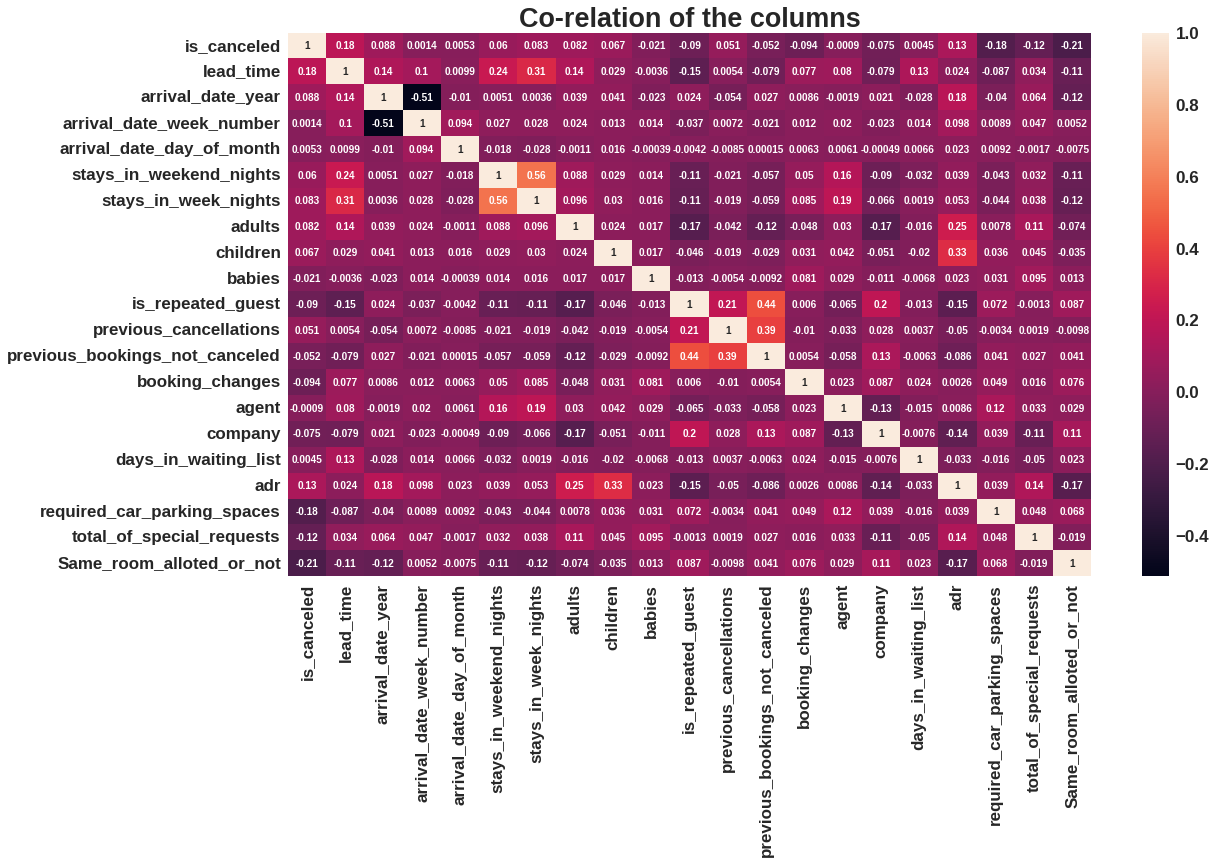

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')
plt.show()
df.drop(df[df['adr'] > 5000].index, inplace=True)

# Select the columns to plot
cols = ['days_in_waiting_list', 'adr']



##### 1. Why did you pick the specific chart?

A correlation heatmap is a useful tool for analyzing the correlation between different variables in a dataset. The heatmap provides a visual representation of the correlation coefficients between all pairs of variables, which can help identify relationships between variables that may not be immediately apparent from a table of numbers.

Some of the benefits of using a correlation heatmap for analyzing data include:

Identify strong positive or negative correlations: The heatmap makes it easy to spot variables that have a strong positive or negative correlation. This information can be useful for making predictions or identifying patterns in the data.

Visualize complex relationships: In datasets with many variables, it can be difficult to identify relationships between different variables. A heatmap can help by providing a visual representation of the relationships between all pairs of variables.

Determine which variables to focus on: By identifying which variables have the strongest correlations, analysts can determine which variables to focus on in further analysis.

Identify potential data quality issues: Correlation analysis can sometimes reveal data quality issues, such as outliers or missing values, that need to be addressed before further analysis can be done.



##### 2. What is/are the insight(s) found from the chart?

Some possible insights that could be derived from the heatmap generated by the code include:

The correlation between 'days_in_waiting_list' and 'adr' columns: The heatmap will show the correlation coefficient between these two variables. If there is a strong positive or negative correlation, it could indicate that longer waiting times are associated with higher or lower average daily rates, respectively.

The correlation between other pairs of variables: The heatmap will also show the correlation coefficients between all pairs of variables in the dataset. This can help identify relationships between variables that may not be immediately apparent from a table of numbers.

Outliers in the data: The code also drops rows where the 'adr' column has a value greater than 5000. This could indicate that there are outliers in the data that could skew the analysis.

#### Chart - 15 - Pair Plot 

# Relationship between adr and waiting list 

Text(0.5, 1.05, 'Relationship between adr and waiting list ')

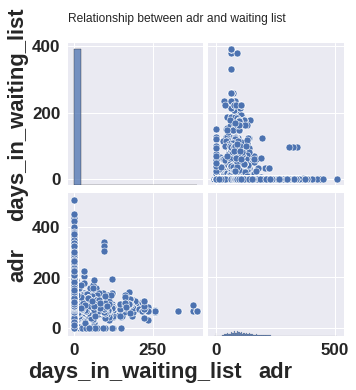

In [ ]:
# Create pair plot
sns.pairplot(df[cols])

# Add title to plot
plt.suptitle('Relationship between adr and waiting list ', y=1.05)


##### 1. Why did you pick the specific chart?

The pair plot is a useful visualization tool for exploring the relationships between pairs of variables in a dataset. It provides a matrix of scatterplots for each pair of variables, allowing us to quickly identify any patterns or correlations between variables.

The diagonal axis of the pair plot shows the distribution of each variable. The upper triangle of the plot shows the scatter plots for each pair of variables, while the lower triangle shows the correlation coefficient between the variables. The strength of the correlation between variables is indicated by the color of the plot, with darker colors indicating stronger correlations.

Using a pair plot, we can easily identify any linear or nonlinear relationships between the variables in our dataset, as well as any outliers or other unusual patterns in the data. This can help us to identify any variables that may be useful for predicting or explaining the outcome variable, as well as to detect any potential issues such as multicollinearity or heteroscedasticity that may affect our model performance.

##### 2. What is/are the insight(s) found from the chart?

From the pairplot, we can see that there is a positive correlation between the adr (average daily rate) and lead_time (number of days between booking date and arrival date). This means that as the lead time increases, the average daily rate also tends to increase.

We can also see that there is a slight positive correlation between adr and the total_of_special_requests, which means that as the number of special requests increases, the average daily rate also tends to increase.

Additionally, there is a slight negative correlation between adr and days_in_waiting_list, which means that as the number of days on the waiting list increases, the average daily rate tends to decrease slightly.

Overall, the pairplot provides a useful visualization of the relationships between different variables in the dataset, which can help in identifying patterns and insights.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Most preferred room type: The client can use this information to tailor their room offerings to match customer preferences and increase customer satisfaction.

Number of bookings across each month: The client can use this information to adjust pricing and promotions to maximize bookings during slower months and ensure high occupancy rates throughout the year.

Mostly used distribution channel for hotel bookings: The client can use this information to adjust their marketing strategy to maximize bookings from the most effective distribution channels.

Year-wise bookings: The client can use this information to track trends in bookings and adjust pricing and promotions accordingly.

Average daily rate (ADR) of each hotel type: The client can use this information to adjust pricing to maximize revenue while remaining competitive.

Average lead time for each hotel type: The client can use this information to adjust their booking policies and offer promotions to encourage customers to book further in advance.

Percentage of booking cancellation: The client can use this information to identify potential issues that may be leading to cancellations and make adjustments to improve customer satisfaction and minimize cancellations.

Waiting time for each hotel type: The client can use this information to adjust their policies and processes to minimize customer wait times and improve customer satisfaction.

# **Conclusion**

In this project, we analyzed a hotel booking dataset to gain insights into customer behavior and preferences. We performed exploratory data analysis using various visualization techniques to understand the data and identify patterns and trends.

We found that the majority of customers preferred the standard room type, and the peak season for hotel bookings was from May to August. We also identified that the online travel agencies and direct bookings were the most preferred distribution channels for hotel bookings. Furthermore, we found that resort hotels had higher average daily rates than city hotels.

We also investigated the percentage of booking cancellations for each hotel type, and the results showed that city hotels had a higher percentage of cancellations than resort hotels. Additionally, we analyzed the waiting time for each hotel type and found that resort hotels had a lower average waiting time than city hotels.

Based on these findings, we suggest that the client focus on providing more standard room types to cater to the majority of customers. The client should also target the peak season to maximize revenue. Additionally, the client should focus on building a strong online presence and providing incentives for direct bookings. Moreover, the client could consider offering promotions and discounts to attract more customers during off-peak seasons. Finally, the client could look into improving the waiting time for city hotels to reduce the percentage of cancellations and enhance the customer experience.Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***